In [1]:
from data_cleaning import *

c:\Users\Tyreek ALEXANDER\OneDrive - Northern Caribbean University\Documents\EffectiveXGBoost\SURVEY\data_cleaning.py:19: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag=pd.read_csv(z.open(member_name))


In [2]:
import dtreeviz
from feature_engine import encoding, imputation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import base, compose, datasets,ensemble,metrics,model_selection,pipeline,preprocessing,tree
import scikitplot
import xgboost as xgb
import yellowbrick.model_selection as ms
from yellowbrick import classifier
import urllib
import zipfile

# import xg_helpers as xhelp

EARLY STOPPING

In [3]:
xg=xgb.XGBClassifier()
xg.fit(Xtrain,ytrain)
xg.score(Xtest,ytest)

0.7458563535911602

In [4]:
xg=xgb.XGBClassifier(early_stopping_rounds=20)
xg.fit(Xtrain,ytrain,eval_set=[(Xtrain,ytrain),(Xtest,ytest)])
xg.score(Xtest,ytest)

[0]	validation_0-logloss:0.61534	validation_1-logloss:0.61775
[1]	validation_0-logloss:0.57046	validation_1-logloss:0.57623
[2]	validation_0-logloss:0.54011	validation_1-logloss:0.55333
[3]	validation_0-logloss:0.51965	validation_1-logloss:0.53711
[4]	validation_0-logloss:0.50419	validation_1-logloss:0.52511
[5]	validation_0-logloss:0.49176	validation_1-logloss:0.51741
[6]	validation_0-logloss:0.48159	validation_1-logloss:0.51277
[7]	validation_0-logloss:0.47221	validation_1-logloss:0.51040
[8]	validation_0-logloss:0.46221	validation_1-logloss:0.50713
[9]	validation_0-logloss:0.45700	validation_1-logloss:0.50583
[10]	validation_0-logloss:0.45062	validation_1-logloss:0.50430
[11]	validation_0-logloss:0.44533	validation_1-logloss:0.50338
[12]	validation_0-logloss:0.43736	validation_1-logloss:0.50033
[13]	validation_0-logloss:0.43399	validation_1-logloss:0.50034
[14]	validation_0-logloss:0.43004	validation_1-logloss:0.50192
[15]	validation_0-logloss:0.42550	validation_1-logloss:0.50268
[1

0.7558011049723757

In [5]:
xg.best_ntree_limit

13

Text(0.5, 0, 'ntrees')

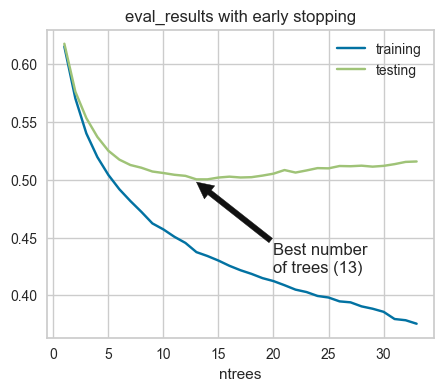

In [10]:
results=xg.evals_result()
fig,ax=plt.subplots(figsize=(8,4))
ax=(pd.DataFrame({'training':results['validation_0']['logloss'],'testing':results['validation_1']['logloss']})
.assign(ntrees=lambda adf: range(1,len(adf)+1))
.set_index('ntrees')
.plot(figsize=(5,4),ax=ax,title='eval_results with early stopping')
)
ax.annotate('Best number \nof trees (13)', xy=(13,.498),xytext=(20,.42),arrowprops={'color':'k'})
ax.set_xlabel('ntrees')